<h1 style="color:#228B22; font-family: 'Georgia'; text-align:center; font-size:36px;">
  Analyzing Public Sentiment Toward <span style="color:#32CD32;">Wicked</span> Using Google Search Data
</h1>


<div style="display: flex; align-items: flex-start; justify-content: space-between;">
  <!-- Summary Section -->
  <div style="flex: 1; margin-right: 20px;">
    <h2 style="color:#228B22; font-family: 'Georgia'; text-align:center; font-size:28px;">
      Summary
    </h2>
    <ul style="color:#006400; font-family: 'Courier New'; font-size:16px; line-height:1.6;">
      <li>
        <b><a href="#data-cleaning-preprocessing" style="color:#32CD32; text-decoration:none;">I. Data Cleaning and Preprocessing</a></b>
        <ul>
          <li><a href="#data-cleaning" style="color:#228B22; text-decoration:none;">1. Data Cleaning</a></li>
          <li><a href="#data-preprocessing" style="color:#228B22; text-decoration:none;">2. Data Preprocessing</a></li>
        </ul>
      </li>
      <li>
        <b><a href="#sentiment-analysis" style="color:#32CD32; text-decoration:none;">II. Sentiment Analysis</a></b>
      </li>
    </ul>
  </div>

  <!-- Image Section -->
  <div style="flex: 1; text-align: right;">
    <img src="wicked-cynthia-erivo-ariana-grande.webp" alt="Wicked Summary Image" style="max-width: 100%; height: auto; border-radius: 10px; border: 2px solid #32CD32;">
  </div>
</div>



<h2 id="data-cleaning-preprocessing" style="color:#006400; font-family: 'Georgia'; text-align:left; font-size:28px; border-bottom: 2px solid #32CD32;">
  Data Cleaning and Preprocessing
</h2>


<h3 id="data-cleaning" style="color:#228B22; font-family: 'Georgia';">
  1. Data Cleaning
</h3>
<ul style="color:#006400; font-family: 'Courier New'; font-size:16px;">
  <li id="remove-spaces">a. Remove extra spaces from the snippet</li>
  <li id="remove-stopwords">b. Remove stopwords from the snippet</li>
  <li id="extract-date">c. Extract date out of the snippet and convert to datetime</li>
  <li id="remove-date">d. Remove date out of the snippet</li>
  <li id="filter-date">e. Filter to only include date >= November 1st, 2024</li>
  <li id="convert-lowercase">f. Convert text snippet to lowercase</li>
</ul>


In [1]:
# Install 
%pip install matplotlib
from wordcloud import WordCloud


# Import Python libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the dataset
data = pd.read_csv("google_search_results_with_categories.csv")

In [3]:
# Dispaly the first 5 rows of the dataset
data.head()

,query,category,title,link,snippet
0,Wicked 2024 reviews,General Reviews,'Wicked' Review: Cynthia Erivo and Ariana Gran...,https://www.nytimes.com/2024/11/21/movies/wick...,"Nov 27, 2024 ... Rated PG for mild magical may..."
1,Wicked 2024 reviews,General Reviews,Wicked (2024) - User reviews - IMDb,https://www.imdb.com/title/tt1262426/reviews/,The run-time of the film should have produced ...
2,Wicked 2024 reviews,General Reviews,"Review: For a Movie About Defying Gravity, Wic...",https://time.com/7177832/wicked-movie-review/,"Nov 20, 2024 ... John M. Chu's adaptation of t..."
3,Wicked 2024 reviews,General Reviews,‎'Wicked' review by davidehrlich • Letterboxd,https://letterboxd.com/davidehrlich/film/wicke...,"this isn't a review of Wicked, which i might'v..."
4,Wicked 2024 reviews,General Reviews,"In 'Wicked', Bad Has Never Felt So Good | Film...",https://www.thehollywoodoutsider.com/wicked-20...,"Nov 21, 2024 ... Wicked (2024) | Film Review ...."


In [4]:
# Remove extra spaces from the text snippet
data['snippet'] = data['snippet'].str.strip().replace(r'\s+', ' ', regex=True)


In [5]:
# Remove stopwrods from the snippet
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):
    if pd.isna(text):
        return text
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Set Pandas to display the full content of each cell
pd.set_option('display.max_colwidth', None)

# Display the first 5 rows of the snippet column before removing stopwords
print(data['snippet'].head())

# Apply to Snippet column
data['snippet'] = data['snippet'].apply(remove_stopwords)

# Display the first 5 rows of the snippet column
print(data['snippet'].head())


0                                                    Nov 27, 2024 ... Rated PG for mild magical mayhem. Running time: 2 hours 40 minutes. In theaters. Wicked. Find Tickets.
1           The run-time of the film should have produced a better understanding of the characters and a stronger plot. However, it merely presented a song-fest, with a ...
2                Nov 20, 2024 ... John M. Chu's adaptation of the stage musical, starring Cynthia Erivo and Ariana Grande, might make you feel trapped in someone else's ...
3            this isn't a review of Wicked, which i might've hated, it's a really ... Wicked 2024. ☆½. Rewatched Nov 22, 2024 ... reviews of movies like “Mother's Day,” ...
4    Nov 21, 2024 ... Wicked (2024) | Film Review ... Full disclosure: I have never seen the Broadway stage musical Wicked. Also, I had never heard a single note of any ...
Name: snippet, dtype: object
0                                 Nov 27, 2024 ... Rated PG mild magical mayhem. Running time: 2 hours 40 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nafis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Extract the date out of the text snippet (the first 10 characters)
data['date'] = data['snippet'].str[:12]

# Convert to datetime format
data['date'] = pd.to_datetime(data['date'], format='%b %d, %Y', errors='coerce')

# Display the first 5 rows to verify
print(data[['snippet', 'date']].head())


                                                                                                                                         snippet  \
0                               Nov 27, 2024 ... Rated PG mild magical mayhem. Running time: 2 hours 40 minutes. theaters. Wicked. Find Tickets.   
1                                 run-time film produced better understanding characters stronger plot. However, merely presented song-fest, ...   
2      Nov 20, 2024 ... John M. Chu's adaptation stage musical, starring Cynthia Erivo Ariana Grande, might make feel trapped someone else's ...   
3                  review Wicked, might've hated, really ... Wicked 2024. ☆½. Rewatched Nov 22, 2024 ... reviews movies like “Mother's Day,” ...   
4  Nov 21, 2024 ... Wicked (2024) | Film Review ... Full disclosure: never seen Broadway stage musical Wicked. Also, never heard single note ...   

        date  
0 2024-11-27  
1        NaT  
2 2024-11-20  
3        NaT  
4 2024-11-21  


In [7]:
# Remove the date from the text snippet
data['snippet'] = data['snippet'].str[13:]

# Display the first 5 rows of the snippet column
data['snippet'].head()

0                                 ... Rated PG mild magical mayhem. Running time: 2 hours 40 minutes. theaters. Wicked. Find Tickets.
1                                    produced better understanding characters stronger plot. However, merely presented song-fest, ...
2        ... John M. Chu's adaptation stage musical, starring Cynthia Erivo Ariana Grande, might make feel trapped someone else's ...
3                    , might've hated, really ... Wicked 2024. ☆½. Rewatched Nov 22, 2024 ... reviews movies like “Mother's Day,” ...
4    ... Wicked (2024) | Film Review ... Full disclosure: never seen Broadway stage musical Wicked. Also, never heard single note ...
Name: snippet, dtype: object

In [8]:
# Filter to only include date starting from November 2024
data = data[data['date'] >= '2024-11-01']

In [9]:
# Convert text snipper to lowercase
data['snippet'] = data['snippet'].str.lower()

In [10]:
# Save the updated cleaned dataset to a new CSV FILE
data.to_csv("wicked_reviews_cleaned.csv", index=False)
print("Data saved successfully to wicked_reviews_cleaned.csv")

Data saved successfully to wicked_reviews_cleaned.csv


<h3 id="data-preprocessing" style="color:#228B22; font-family: 'Georgia';">
  2. Data Preprocessing
</h3>
<ul style="color:#006400; font-family: 'Courier New'; font-size:16px;">
  <li id="reviews-by-categories">a. Number of reviews by categories</li>
  <li id="reviews-over-time">b. Number of reviews over time</li>
  <li id="word-cloud">c. Common Words in the reviews (Word Cloud)</li>
</ul>


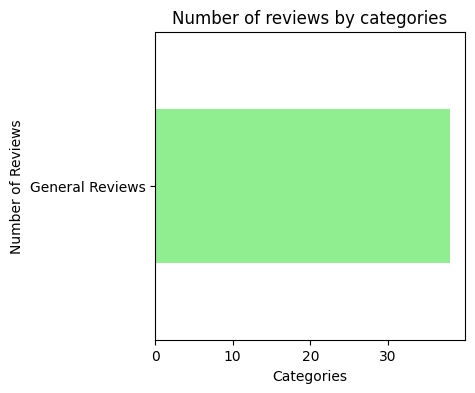

In [11]:
# Number of reviews by categories (Bar chart)

# Count reviews by categories
category_counts = data['category'].value_counts().sort_values(ascending=False)

# Plot the bar chart
category_counts.plot(kind='barh', figsize=(4,4), color = "lightgreen")
plt.xlabel('Categories')
plt.ylabel('Number of Reviews')
plt.title('Number of reviews by categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest count at the top
plt.show()



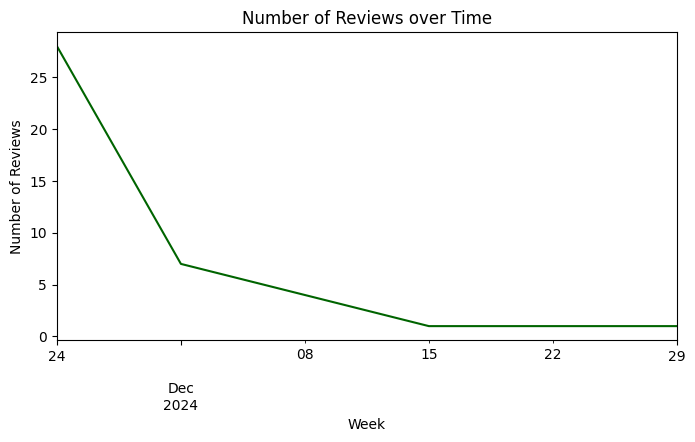

In [12]:
# Number of reviews over time (Weekly Line Chart)
# Group data by week to count reviews for each week
weekly_data = data.groupby(data['date'].dt.to_period('W')).size()

# Plot the line chart
weekly_data.plot(kind='line', figsize=(8,4), color = "darkgreen")
plt.xlabel('Week')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews over Time')
plt.show()


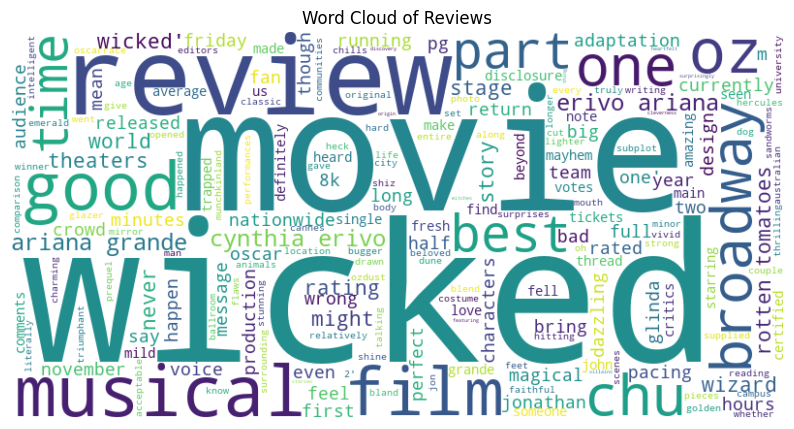

In [13]:
# Most common words in the reviews (Word Cloud)
# Combine all the snippets into a single string
all_snippets = " ".join(data['snippet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_snippets)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [14]:
from collections import Counter

# Tokenize and count word frequency
words = all_snippets.split()
word_counts = Counter(words)

# Display the 10 most common words
print("Most common words:", word_counts.most_common(10))


Most common words: [('...', 73), ('wicked', 13), ('movie', 11), ('film', 6), ('good', 6), ('erivo', 5), ('ariana', 5), ('broadway', 5), ('-', 5), ('one', 5)]


<h2 id="sentiment-analysis" style="color:#006400; font-family: 'Georgia'; text-align:left; font-size:28px; border-bottom: 2px solid #32CD32;">
  Sentiment Analysis
</h2>


<h3 style="color:#228B22; font-family: 'Georgia';">Defining Sentiment Analysis Function using TextBlob</h3>
<ul style="color:#006400; font-family: 'Courier New'; font-size:16px;">
  <p>Explanation of Polarity:</p>
  <li>Positive Sentiment: Polarity > 0</li>
  <li>Neutral Sentiment: Polarity = 0</li>
  <li>Negative Sentiment: Polariry < 0</li>
</ul>



In [15]:
# Implement Sentiment Analysis
from textblob import TextBlob

# Function to get the sentiment of a text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply the function to the snippet column
data['sentiment'] = data['snippet'].apply(get_sentiment)

# Categorize the sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# Apply the function to the sentiment column
data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Display the first 5 rows of the sentiment and sentiment_category columns
print(data[['sentiment', 'sentiment_category']].head())

# Save the updated data with sentiment analysis to a new CSV file
data.to_csv("wicked_reviews_sentiment.csv", index=False)
print("Data saved successfully to wicked_reviews_sentiment.csv")

   sentiment sentiment_category
0   0.416667           Positive
2  -0.100000           Negative
4   0.092857           Positive
6   0.000000            Neutral
7   0.075000           Positive
Data saved successfully to wicked_reviews_sentiment.csv


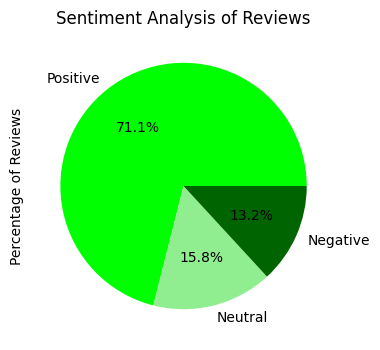

In [16]:
# Analyze the sentiment of the reviews
# Number of reviews by sentiment category (Pie chart)

# Count reviews by sentiment category
sentiment_counts = data['sentiment_category'].value_counts()

# Plot the pie chart
sentiment_counts.plot(kind='pie', figsize=(4,4), autopct='%1.1f%%', colors=['lime', 'lightgreen', 'darkgreen'])
plt.title('Sentiment Analysis of Reviews')
plt.ylabel('Percentage of Reviews')
plt.show()


In [17]:
"""import matplotlib.pyplot as plt

# List of green shades
green_colors = ['lightgreen', 'lime', 'limegreen', 'forestgreen', 'palegreen', 
                'darkgreen', 'yellowgreen', 'springgreen', 'mediumseagreen', 'seagreen']

# Display green shades
plt.figure(figsize=(12, 2))
for i, color in enumerate(green_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)
    plt.text(i + 0.5, -0.2, color, ha='center', fontsize=10)
plt.xlim(0, len(green_colors))
plt.ylim(0, 1)
plt.axis('off')
plt.title("Green Shades in Matplotlib")
plt.show()
"""

'import matplotlib.pyplot as plt\n\n# List of green shades\ngreen_colors = [\'lightgreen\', \'lime\', \'limegreen\', \'forestgreen\', \'palegreen\', \n                \'darkgreen\', \'yellowgreen\', \'springgreen\', \'mediumseagreen\', \'seagreen\']\n\n# Display green shades\nplt.figure(figsize=(12, 2))\nfor i, color in enumerate(green_colors):\n    plt.fill_between([i, i + 1], 0, 1, color=color)\n    plt.text(i + 0.5, -0.2, color, ha=\'center\', fontsize=10)\nplt.xlim(0, len(green_colors))\nplt.ylim(0, 1)\nplt.axis(\'off\')\nplt.title("Green Shades in Matplotlib")\nplt.show()\n'